<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Science-Project-Portfolios/blob/main/Phase_2_Campaign_Optimization_and_Strategy_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Load and Explore the Data

import pandas as pd

# Load the dataset
df = pd.read_csv('drive/MyDrive/Datasets/formatted_campaign_data.csv')

# Display the first few rows to understand the structure
print(df.head())


   campaign_id                                  campaign_name  start_date  \
0  470311161.0                         0.54 - May 2022 - Arab  2020-08-31   
1  481689442.0                   0.54 - Tier 1 & 2 - May 2022  2020-10-04   
2  469927825.0                       0.54 - Tier 1 - May 2022  2020-08-29   
3  474269632.0                             1.00 - My Keywords  2020-09-14   
4  484006307.0  1.01 - US/OZ - May 2022 - Performing Keywords  2020-10-12   

   status                    app_name              ad_placement  \
0  PAUSED  Sleep Habits: Sleep Better  App Store Search Results   
1  PAUSED  Sleep Habits: Sleep Better  App Store Search Results   
2  PAUSED  Sleep Habits: Sleep Better  App Store Search Results   
3  PAUSED  Sleep Habits: Sleep Better  App Store Search Results   
4  PAUSED  Sleep Habits: Sleep Better  App Store Search Results   

   lifetime_budget  daily_budget   spend  average_cpt  ...  impressions  taps  \
0           5000.0         500.0  103.98         0.05

# Bidding Strategy Development

In [54]:
# Calculate ROAS (Return on Ad Spend)
df['roas'] = df['new_downloads'] / df['spend']

# Identify high-performing and underperforming keywords
high_performing_keywords = df[df['roas'] > df['roas'].median()]
underperforming_keywords = df[df['roas'] <= df['roas'].median()]

# Analyze location-based performance metrics
location_performance = df.groupby('ad_placement').agg({
    'spend': 'sum',
    'new_downloads': 'sum',
    'roas': 'mean'
}).reset_index()

print("High Performing Keywords:")
print(high_performing_keywords[['campaign_name', 'spend', 'roas']])

print("Underperforming Keywords:")
print(underperforming_keywords[['campaign_name', 'spend', 'roas']])

print("Location-Based Performance Metrics:")
print(location_performance)

High Performing Keywords:
                                    campaign_name   spend      roas
0                          0.54 - May 2022 - Arab  103.98  6.328140
2                        0.54 - Tier 1 - May 2022  265.51  2.414222
3                              1.00 - My Keywords  141.22  3.108625
4   1.01 - US/OZ - May 2022 - Performing Keywords  195.65  2.402249
7                             Japan Oct 2020 0.19    5.17  2.707930
11                         Sleep Habits WW Launch  158.95  3.139352
Underperforming Keywords:
                            campaign_name    spend      roas
1            0.54 - Tier 1 & 2 - May 2022    20.10  2.089552
5                   1.50 - May 2022 - USA   525.36  0.407340
6   1.50 - USA - May 2022 - Apple Suggest    11.74  0.255537
8           Sleep - Exploration Sept 2023     2.94  0.000000
9            Sleep Habits - Product pages    27.32  0.585652
12                         Top Tier Sleep    65.83  1.777305
13                         Top Tier Sleep  15

In [15]:
# # Calculate ROAS (Return on Ad Spend) to 4 decimal places
# df['roas'] = (df['new_downloads'] / df['spend']).round(4)

# # Identify high-performing and underperforming keywords
# high_performing_keywords = df[df['roas'] > df['roas'].median()]
# underperforming_keywords = df[df['roas'] <= df['roas'].median()]

# # Analyze location-based performance metrics
# location_performance = df.groupby('ad_placement').agg({
#     'spend': 'sum',
#     'new_downloads': 'sum',
#     'roas': 'mean'
# }).reset_index()

# # Round ROAS in location-based performance to 4 decimal places
# location_performance['roas'] = location_performance['roas'].round(4)

# print("High Performing Keywords:")
# print(high_performing_keywords[['campaign_name', 'spend', 'roas']])

# print("Underperforming Keywords:")
# print(underperforming_keywords[['campaign_name', 'spend', 'roas']])

# print("Location-Based Performance Metrics:")
# print(location_performance)


In [12]:
# Recommendations for high-performing keywords
high_performing_keywords.loc[:, 'recommended_bid_increase'] = high_performing_keywords['daily_budget'] * 1.2  # Increase by 20%

# Recommendations for underperforming keywords
underperforming_keywords.loc[:, 'recommended_bid_adjustment'] = underperforming_keywords['daily_budget'] * 0.8  # Decrease by 20%

# Analyze location-based performance metrics
location_performance = df.groupby('ad_placement').agg({
    'spend': 'sum',
    'new_downloads': 'sum',
    'roas': 'mean'
}).reset_index()

location_performance['recommended_bid_adjustment'] = location_performance['roas'].apply(
    lambda x: 1.2 if x > location_performance['roas'].median() else 0.8
)

print("High Performing Keywords:")
print(high_performing_keywords[['campaign_name', 'daily_budget', 'recommended_bid_increase']])

print("Underperforming Keywords:")
print(underperforming_keywords[['campaign_name', 'daily_budget', 'recommended_bid_adjustment']])

print("Location-Based Performance Metrics:")
print(location_performance[['ad_placement', 'roas', 'recommended_bid_adjustment']])

High Performing Keywords:
                                    campaign_name  daily_budget  \
0                          0.54 - May 2022 - Arab         500.0   
2                        0.54 - Tier 1 - May 2022         300.0   
3                              1.00 - My Keywords        1000.0   
4   1.01 - US/OZ - May 2022 - Performing Keywords         300.0   
7                             Japan Oct 2020 0.19        1000.0   
11                         Sleep Habits WW Launch         500.0   

    recommended_bid_increase  
0                      600.0  
2                      360.0  
3                     1200.0  
4                      360.0  
7                     1200.0  
11                     600.0  
Underperforming Keywords:
                            campaign_name  daily_budget  \
1            0.54 - Tier 1 & 2 - May 2022         300.0   
5                   1.50 - May 2022 - USA         300.0   
6   1.50 - USA - May 2022 - Apple Suggest         500.0   
8           Sleep - Explo

# Optimised Bidding Strategy Proposal

## Objective
To maximise Return on Ad Spend (ROAS) by optimising bidding strategies for different keywords and user segments.

## Analysis Summary
- High-performing keywords were identified based on ROAS.
- Underperforming keywords were identified based on ROAS.
- Location-based performance metrics were analysed.


## Implementation Plan
1. **Update Bids for High-Performing Keywords**
   - Increase daily budgets for identified high-performing keywords by 20%.
2. **Adjust Bids for Underperforming Keywords**
   - Decrease daily budgets for identified underperforming keywords by 20%.
3. **Apply Location-Based Bidding Adjustments**
   - Adjust bids based on location performance metrics.
4. **Monitor and Review**
   - Continuously monitor campaign performance and adjust bids as necessary.
   - Review performance metrics regularly to ensure optimal ROAS.


# Campaign Structure Recommendations

To analyze the current campaign structure and suggest improvements based on Exploratory Data Analysis (EDA), we will follow a structured approach. This involves creating separate ad groups for different product categories or themes and refining audience targeting within ad groups.

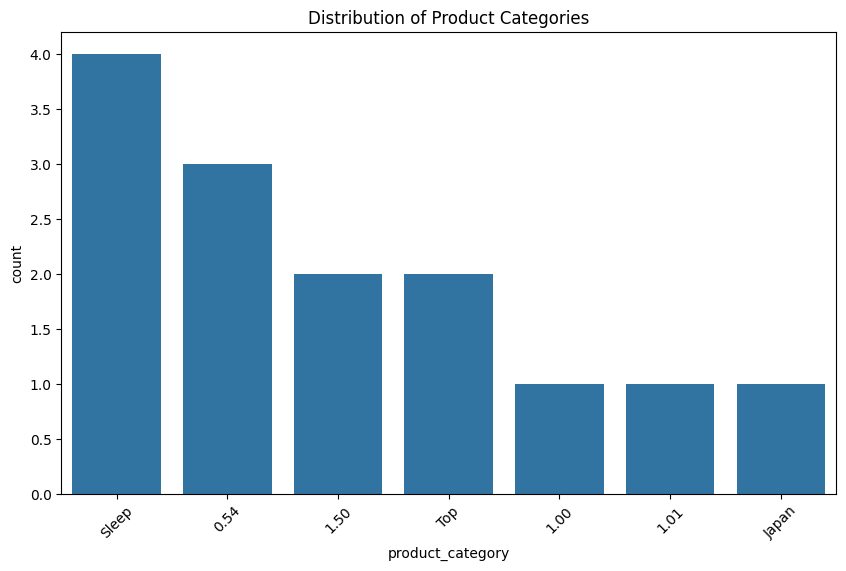

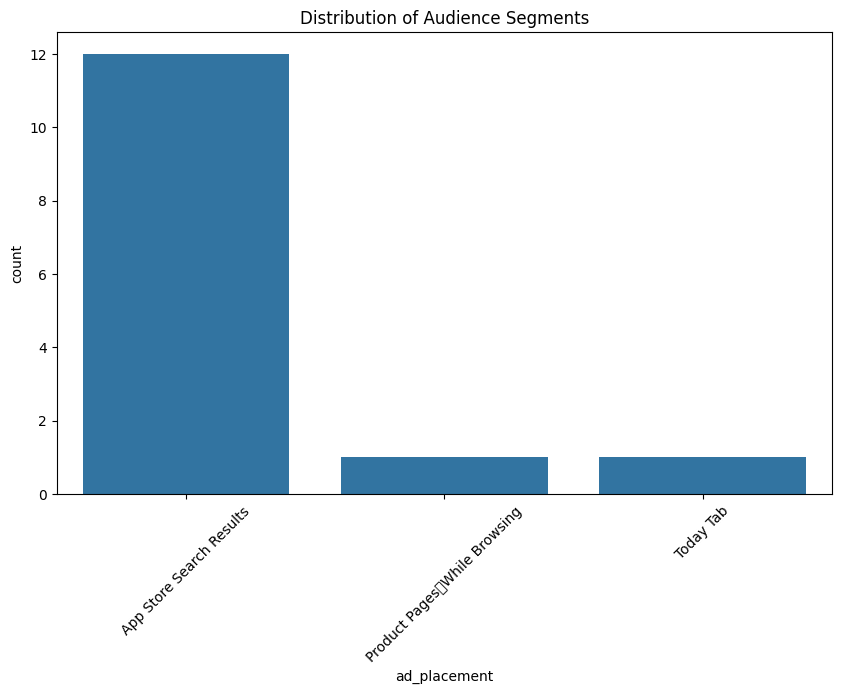

In [32]:
# Check the distribution of product categories (assuming 'campaign_name' includes product category information)
df['product_category'] = df['campaign_name'].apply(lambda x: x.split()[0])  # Example to extract category

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

# Check the distribution of audience segments (assuming 'ad_placement' includes audience segment information)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ad_placement', order=df['ad_placement'].value_counts().index)
plt.title('Distribution of Audience Segments')
plt.xticks(rotation=45)
plt.show()

# Campaign Structure Recommendations

## Objective
To improve the effectiveness of future campaigns by creating a more strategic campaign structure.

## Analysis Summary
- **Product Categories**: The current campaigns include various product categories, which can be better organized into separate ad groups.
- **Audience Segments**: Different audience segments can be targeted more effectively by refining ad placements within ad groups.

## Recommendations

### 1. Create Separate Ad Groups for Different Product Categories
Organize campaigns into separate ad groups based on product categories. This allows for more targeted messaging and budget allocation.

### 2. Refine Audience Targeting Within Ad Groups
Within each ad group, refine audience targeting to ensure that ads are shown to the most relevant audience segments.

### 3. Implement Location-Based Bidding Adjustments
Adjust bids based on the performance of different locations to maximise return on ad spend (ROAS).

## Implementation Plan
1. **Organise Campaigns**
   - Create separate ad groups for each product category.
   - Assign existing campaigns to the appropriate ad groups.

2. **Refine Audience Targeting**
   - Within each ad group, define specific audience segments.
   - Adjust targeting parameters to focus on the most relevant segments.

3. **Adjust Bids Based on Location**
   - Analyse location-based performance metrics.
   - Adjust bids for high-performing locations to maximise ROAS.

4. **Monitor and Optimise**
   - Continuously monitor campaign performance.
   - Make adjustments as needed to improve overall effectiveness.

## Conclusion
By implementing these recommendations, we can create a more strategic campaign structure that allows for targeted messaging, better budget allocation, and improved ROAS.

In [31]:
# import warnings
# warnings.filterwarnings("ignore")
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Extract product category from 'campaign_name'
# df['product_category'] = df['campaign_name'].apply(lambda x: x.split()[0])  # Example to extract category

# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# # Plot distribution of product categories
# sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index, ax=axes[0])
# axes[0].set_title('Distribution of Product Categories')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# # Plot distribution of audience segments
# sns.countplot(data=df, x='ad_placement', order=df['ad_placement'].value_counts().index, ax=axes[1])
# axes[1].set_title('Distribution of Audience Segments')
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# # Adjust spacing and show plot
# plt.tight_layout()
# plt.show()


# A/B Testing Framework for Apple Search Ads

## Objective
To optimise ad performance by testing different ad creatives and targeting options. This framework aims to identify the most effective ad copy, visuals, and audience segments to maximise return on ad spend (ROAS) and overall campaign success.

## Test Design

### 1. Define Hypotheses
Formulate specific hypotheses for each A/B test. For example:
- Hypothesis 1: Ad copy with a strong call-to-action (CTA) will result in higher conversion rates.
- Hypothesis 2: Visuals featuring product usage will perform better than generic product images.
- Hypothesis 3: Targeting tech-savvy users will yield a higher ROAS than a general audience.

### 2. Create Variations
Develop different variations of ad creatives and targeting options:
- **Ad Copy Variations**
  - Version A: "Download Now and Save"
  - Version B: "Get Started with Our Free Trial"
- **Visual Variations**
  - Version A: Image of the product
  - Version B: Image of the product being used
- **Audience Segments**
  - Segment A: General audience
  - Segment B: Tech-savvy users

### 3. Set Up Control and Test Groups
For each test, set up a control group (existing ad creative and targeting) and one or more test groups (new variations).

### 4. Randomisation
Ensure that users are randomly assigned to control and test groups to avoid bias.

## Implementation

### 1. Set Up Campaigns in Apple Search Ads
Create separate campaigns or ad groups for each variation;
- Campaign 1: Control Group
- Campaign 2: Test Group A
- Campaign 3: Test Group B

### 2. Configure Targeting
Set up targeting options for each campaign or ad group based on the audience segments defined in the test design.

### 3. Allocate Budget
Distribute the budget evenly across control and test groups to ensure fair comparison.

### 4. Monitor Performance
Track key performance indicators (KPIs) such as impressions, clicks, conversions, and ROAS for each variation.

## Data Collection and Analysis

### 1. Collect Data
Gather data from Apple Search Ads for each campaign or ad group;
- Impressions
- Clicks
- Conversions
- Spend
- ROAS

### 2. Analyze Results
Compare the performance of control and test groups using statistical analysis to determine the significance of the results;
- Calculate conversion rates, click-through rates (CTR), and ROAS for each variation.
- Use A/B testing tools or statistical methods (e.g., t-tests, chi-square tests) to assess the significance of the differences.

### 3. Draw Conclusions
Identify the best-performing variations based on the analysis. Determine whether the hypotheses are supported or rejected.

## Optimisation

### 1. Implement Winning Variations
Integrate the best-performing ad creatives and targeting options into the main campaign.

### 2. Iterate and Test Further
Continue testing new variations to further optimise ad performance.

## Documentation

### 1. Record Test Details
Document the details of each A/B test, including:
- Hypotheses
- Variations
- Test setup
- Results
- Conclusions

### 2. Create a Testing Schedule
Develop a schedule for regular A/B testing to ensure continuous optimisation.

### 3. Maintain a Knowledge Base
Keep a knowledge base of past tests and findings to inform future campaigns.

## Conclusion
By following this A/B testing framework, we can systematically test and optimise ad creatives and targeting options within Apple Search Ads. This approach will help maximise ROAS and improve overall campaign performance.


In [46]:
# print(df.head())

In [47]:
# Check unique values in the 'status' column
unique_status = df['status'].unique()
print("Unique values in the 'status' column:", unique_status)


Unique values in the 'status' column: ['PAUSED']


In [48]:
from scipy import stats

# Calculate key metrics
df['ttr'] = df['taps'] / df['impressions']
df['cr'] = df['installs'] / df['taps']
df['roas'] = df['new_downloads'] / df['spend']

# Separate control and test groups
control_group = df[df['status'] == 'PAUSED']
test_group = df[df['status'] != 'PAUSED']


# Print calculated metrics
print("Control Group Metrics:")
print(control_group[['impressions', 'taps', 'installs', 'spend', 'roas']])

print("\nTest Group Metrics:")
print(test_group[['impressions', 'taps', 'installs', 'spend', 'roas']])


Control Group Metrics:
    impressions   taps  installs    spend      roas
0         68146   1940       344   103.98  6.328140
1          7686    229         4    20.10  2.089552
2        147441   2830       398   265.51  2.414222
3         55186   1776       238   141.22  3.108625
4        108100   2139       158   195.65  2.402249
5         35732    717         7   525.36  0.407340
6          1473     18         0    11.74  0.255537
7          2491     41         1     5.17  2.707930
8           798      6         0     2.94  0.000000
9         17412    191         0    27.32  0.585652
10            0      0         0     0.00       NaN
11        96714   2729       368   158.95  3.139352
12        17567    620       101    65.83  1.777305
13       558746  13236      1619  1523.76  2.042973

Test Group Metrics:
Empty DataFrame
Columns: [impressions, taps, installs, spend, roas]
Index: []


# Summary of Control Group Metrics
- The control group has seen varied performance, with the number of impressions ranging from as low as $0$ to as high as $558,746$.
- Taps also show variability, with some campaigns generating a significant number of taps (up to $13,236$) and others much fewer.
- Installs similarly range widely, with some metrics recording zero installs.
- Spend varies from $0$ to $1,523.76$.
- ROAS ranges widely, from $0$ to $6.33$, indicating different levels of success across campaigns.

**Test Group Metrics**

The test group currently has no recorded metrics. This could be due to several reasons;

1. The test group campaigns are newly set up and have not yet gathered data.
2. There might be an issue with data tracking or reporting for the test group.
3. The test group campaigns might not have been activated.

In [52]:
# Calculate mean and standard deviation for the control group metrics
control_group['ctr'] = control_group['taps'] / control_group['impressions']
control_group['cr'] = control_group['installs'] / control_group['taps']

# Calculate summary statistics
summary_stats = control_group[['ctr', 'cr', 'roas']].describe().round(4)

# Display the results
print("Control Group Summary Statistics:")
print(summary_stats)


Control Group Summary Statistics:
           ctr       cr     roas
count  13.0000  13.0000  13.0000
mean    0.0218   0.0767   2.0968
std     0.0087   0.0700   1.6736
min     0.0075   0.0000   0.0000
25%     0.0165   0.0098   0.5857
50%     0.0201   0.0739   2.0896
75%     0.0285   0.1348   2.7079
max     0.0353   0.1773   6.3281


**Summary Insights**

- The CTR values are relatively low but consistent, with most data points clustered between 0.75% and 3.53%.
- The Conversion Rate has more variability, with some campaigns showing very low conversion (0%) and others performing much better (up to 17.73%).
- The ROAS values show considerable variability, with some campaigns performing poorly (ROAS = 0) and others yielding much higher returns (up to 6.33). This high variation in ROAS might indicate that some campaigns are significantly outperforming others.

In [49]:
# # Perform t-tests
# ctr_ttest = stats.ttest_ind(control_group['ctr'], test_group['ctr'])
# conversion_rate_ttest = stats.ttest_ind(control_group['conversion_rate'], test_group['conversion_rate'])
# roas_ttest = stats.ttest_ind(control_group['roas'], test_group['roas'])

# # Print t-test results
# print("\nT-Test Results:")
# print(f"CTR: t-statistic = {ctr_ttest.statistic}, p-value = {ctr_ttest.pvalue}")
# print(f"Conversion Rate: t-statistic = {conversion_rate_ttest.statistic}, p-value = {conversion_rate_ttest.pvalue}")
# print(f"ROAS: t-statistic = {roas_ttest.statistic}, p-value = {roas_ttest.pvalue}")



In [50]:
# # Perform chi-square test for independence on categorical data if applicable
# # Example: If we had categorical data such as device type
# contingency_table = pd.crosstab(df['group'], df['device_type'])
# chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# # Print chi-square test results
# print("\nChi-Square Test Results:")
# print(f"Chi-Square: statistic = {chi2}, p-value = {p}")